In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.datasets import fetch_covtype

In [4]:
data = fetch_covtype(data_home='task2_data')

In [5]:
data

{'DESCR': 'Forest covertype dataset.\n\nA classic dataset for classification benchmarks, featuring categorical and\nreal-valued features.\n\nThe dataset page is available from UCI Machine Learning Repository\n\n    http://archive.ics.uci.edu/ml/datasets/Covertype\n\nCourtesy of Jock A. Blackard and Colorado State University.\n',
 'data': array([[  2.59600000e+03,   5.10000000e+01,   3.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.59000000e+03,   5.60000000e+01,   2.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.80400000e+03,   1.39000000e+02,   9.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        ..., 
        [  2.38600000e+03,   1.59000000e+02,   1.70000000e+01, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  2.38400000e+03,   1.70000000e+02,   1.50000000e+01, ...,
           0.00000000e+00,   0.00000000e+00,   0.00

In [6]:
cov = pd.DataFrame(data['data'])
cov['Cover_Type'] = data['target']

In [7]:
# Get column names
feature_file = open('feature_names','r')
features = []
for line in feature_file:
    features.append(line.split()[0])

In [8]:
wildareas = [features[10] + str(i) for i in range(1,5)]
soiltypes = [features[11] + str(i) for i in range(1,41)]
features = features[:10] + wildareas + soiltypes + [features[12]]

In [9]:
cov.columns = features

In [10]:
cov.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [11]:
cov.shape

(581012, 55)

### Task 2.1: Visualize the univariate distribution of each feature, and the distribution of the target

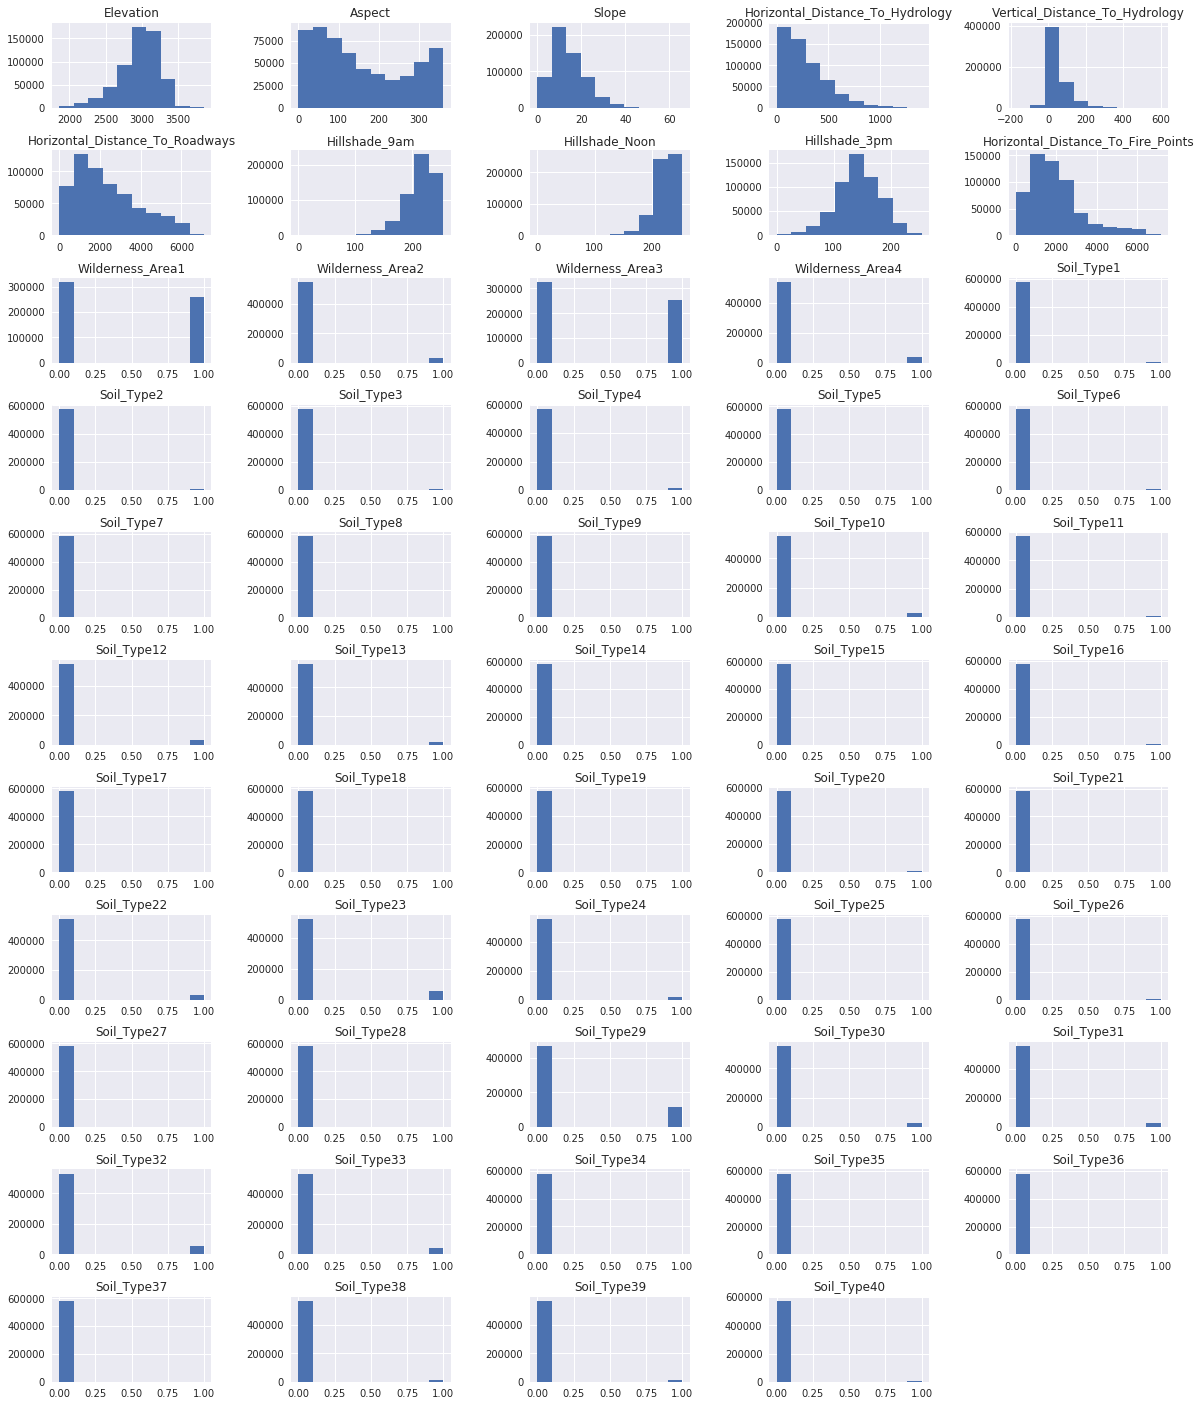

In [12]:
fig = plt.figure(figsize=(20,25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 55):
    ax = fig.add_subplot(11, 5, i)
    cov[cov.columns[i-1]].hist(ax=ax)
    ax.set(title=cov.columns[i-1])

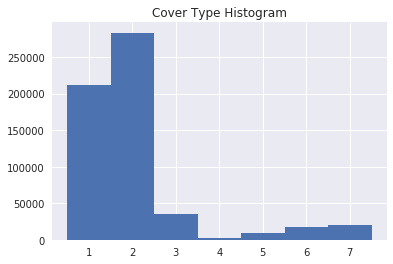

In [13]:
#Distribution of target
plt.hist(cov['Cover_Type'],range=(0.5,7.5),bins=7)
_ = plt.title('Cover Type Histogram')

### Task 2.2: Split data into training and test set. Evaluate Logistic Regression, linear support vector machines and nearest centroids using cross-validation

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data['data'],data['target'],random_state=20)

X_train = X_train[:50000]
y_train = y_train[:50000]

In [15]:
#Evaluate Logistic Regression
logit_score = np.mean(cross_val_score(LogisticRegression(tol=0.0001), X_train, y_train))

In [16]:
#Linear SVM
linearSVM_score = np.mean(cross_val_score(LinearSVC(tol=0.0001, dual=False), X_train, y_train))

In [17]:
#Nearest Centroid
NC_score = np.mean(cross_val_score(NearestCentroid(), X_train, y_train))

In [18]:
print(logit_score)
print(linearSVM_score)
print(NC_score)

0.708256150789
0.705947542451
0.194639694306


In [19]:
#Use standardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [20]:
slogit_score = np.mean(cross_val_score(LogisticRegression(tol=0.0001), X_train_scaled, y_train))
slinearSVM_score = np.mean(cross_val_score(LinearSVC(tol=0.0001, dual=False), X_train_scaled, y_train))
sNC_score = np.mean(cross_val_score(NearestCentroid(), X_train_scaled, y_train))

In [21]:
print(slogit_score)
print(slinearSVM_score)
print(sNC_score)

0.715418375449
0.712604890841
0.548706947943


Logistic regression and Linear SVM have close scores - Logistic regression is slightly better, while Nearest Centroid has very bad score compared to other 2 algorithms. When applying StandardScaler, all 3 algorithms improve in score: logistic regression from 70.8% to 71.5%, linear SVM from 70.6% to 71.3%. Nearest Centroid improves the greatest from 19.5% to 54.9%, althought final score is still far behind other 2 algorithms.

### Task 2.3: Tune the parameters using GridSearchCV

In [22]:
#Tune logistic regression
param_grid_logit = {'C':np.logspace(-2,2,6)}
grid_logit = GridSearchCV(LogisticRegression(tol=0.0001,random_state=20), param_grid_logit)
grid_logit.fit(X_train_scaled, y_train)
print(grid_logit.best_params_)
print(grid_logit.best_score_)

{'C': 100.0}
0.715496409713


In [23]:
#Tune Linear SVM
param_grid_svm = {'C':np.logspace(-2,2,6)}
grid_svm = GridSearchCV(LinearSVC(tol=0.0001, dual=False, random_state=20), param_grid_svm)
grid_svm.fit(X_train_scaled, y_train)
print(grid_svm.best_params_)
print(grid_svm.best_score_)

{'C': 2.5118864315095824}
0.712616377401


In [24]:
#Tune Nearest Centroid
param_grid_NC = {'shrink_threshold':np.linspace(0,20,11)}
grid_NC = GridSearchCV(NearestCentroid(), param_grid_NC)
grid_NC.fit(X_train_scaled, y_train)
print(grid_NC.best_params_)
print(grid_NC.best_score_)

{'shrink_threshold': 0.0}
0.54870696876


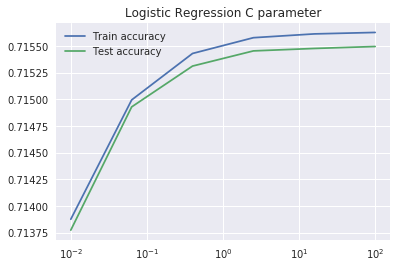

In [25]:
#Visualize GridSearch results
plt.semilogx(param_grid_logit['C'],grid_logit.cv_results_['mean_train_score'],label='Train accuracy')
plt.semilogx(param_grid_logit['C'],grid_logit.cv_results_['mean_test_score'],label='Test accuracy')
_ = plt.title('Logistic Regression C parameter')
_ = plt.legend()

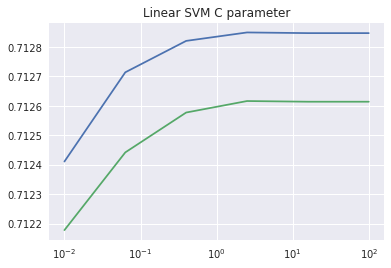

In [26]:
plt.semilogx(param_grid_svm['C'],grid_svm.cv_results_['mean_train_score'],label='Train accuracy')
plt.semilogx(param_grid_svm['C'],grid_svm.cv_results_['mean_test_score'],label='Test accuracy')
_ = plt.title('Linear SVM C parameter')
_ = plt.legend()

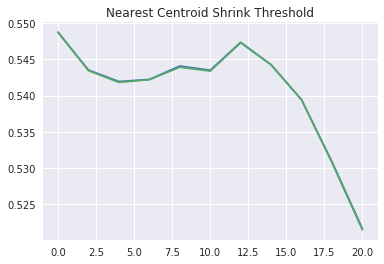

In [27]:
plt.plot(param_grid_NC['shrink_threshold'],grid_NC.cv_results_['mean_train_score'],label='Train accuracy')
plt.plot(param_grid_NC['shrink_threshold'],grid_NC.cv_results_['mean_test_score'],label='Test accuracy')
_ = plt.title('Nearest Centroid Shrink Threshold')
_ = plt.legend()

After GridSearch, the scores for all 3 algorithms do not improve by too much.

### Task 2.4: Change the cross-validation strategy from ‘stratified k-fold’ to ‘kfold’ with shuffling

In [28]:
#Change cross-validation strategy to KFold with shuffling and run GridSearch
kfoldshuffle = KFold(shuffle=True, random_state=1)

In [29]:
#Tune logistic regression with KFold with shuffling
grid_logit_kfold = GridSearchCV(LogisticRegression(tol=0.0001,random_state=20), param_grid_logit, cv=kfoldshuffle)
grid_logit_kfold.fit(X_train_scaled, y_train)
print(grid_logit_kfold.best_params_)
print(grid_logit_kfold.best_score_)

{'C': 100.0}
0.715503294252


In [30]:
#Tune Linear SVM with KFold with shuffling
grid_svm_kfold = GridSearchCV(LinearSVC(tol=0.0001, dual= False, random_state=20), param_grid_svm, cv=kfoldshuffle)
grid_svm_kfold.fit(X_train_scaled, y_train)
print(grid_svm_kfold.best_params_)
print(grid_svm_kfold.best_score_)

{'C': 2.5118864315095824}
0.712731119724


In [31]:
#Tune Nearest Centroid with KFold with shuffling
grid_NC_kfold = GridSearchCV(NearestCentroid(), param_grid_NC,cv=kfoldshuffle)
grid_NC_kfold.fit(X_train_scaled, y_train)
print(grid_NC_kfold.best_params_)
print(grid_NC_kfold.best_score_)

{'shrink_threshold': 0.0}
0.548782698694


In [32]:
#Change random seed of the shuffling
kfoldshuffle2 = KFold(shuffle=True, random_state=2)

In [33]:
#Tune logistic regression with KFold with shuffling
grid_logit_kfold2 = GridSearchCV(LogisticRegression(tol=0.0001,random_state=20), param_grid_logit, cv=kfoldshuffle2)
grid_logit_kfold2.fit(X_train_scaled, y_train)
print(grid_logit_kfold2.best_params_)
print(grid_logit_kfold2.best_score_)

{'C': 15.848931924611142}
0.715455102476


In [34]:
#Tune Linear SVM with KFold with shuffling
grid_svm_kfold2 = GridSearchCV(LinearSVC(tol=0.0001,dual=False, random_state=20), param_grid_svm, cv=kfoldshuffle2)
grid_svm_kfold2.fit(X_train_scaled, y_train)
print(grid_svm_kfold2.best_params_)
print(grid_svm_kfold2.best_score_)

{'C': 15.848931924611142}
0.71274718365


In [35]:
#Tune Nearest Centroid with KFold with shuffling
grid_NC_kfold2 = GridSearchCV(NearestCentroid(), param_grid_NC,cv=kfoldshuffle2)
grid_NC_kfold2.fit(X_train_scaled, y_train)
print(grid_NC_kfold2.best_params_)
print(grid_NC_kfold2.best_score_)

{'shrink_threshold': 0.0}
0.548617469748


In [52]:
#Change random state of split and run GridSearch
X_train3, X_test3, y_train3, y_test3 = train_test_split(data['data'],data['target'],random_state=3)
X_train3_scaled = scaler.fit_transform(X_train3)

In [ ]:
#Tune logistic regression with different random split
grid_logit_split2 = GridSearchCV(LogisticRegression(tol=0.0001,random_state=3), param_grid_logit)
grid_logit_split2.fit(X_train3_scaled, y_train3)
print(grid_logit_split2.best_params_)
print(grid_logit_split2.best_score_)

In [ ]:
#Tune Linear SVM with with different random split
grid_svm_split2 = GridSearchCV(LinearSVC(tol=0.0001,dual=False,random_state=3), param_grid_svm)
grid_svm_split2.fit(X_train3_scaled, y_train3)
print(grid_svm_split2.best_params_)
print(grid_svm_split2.best_score_)

In [ ]:
#Tune Nearest Centroid with different random split
grid_NC_split2 = GridSearchCV(NearestCentroid(), param_grid_NC)
grid_NC_split2.fit(X_train3_scaled, y_train3)
print(grid_NC_split2.best_params_)
print(grid_NC_split2.best_score_)

The parameters after GridSearch do not change after changing from StratifiedKFold to KFold with shuffling. However the parameters do change when we change the random state of the shuffling, from (100,2.5) for Logistic Regression and Linear SVM to (15.8,15.8). When changing the random state of the split into training and test data, 

### Task 2.5: Visualize the coefficients for LogisticRegression and Linear Support Vector Machines

In [42]:
#Logistic regression model
logitmodel = LogisticRegression(tol=0.0001,C=grid_logit.best_params_['C'],random_state=20)
logitmodel.fit(X_train_scaled,y_train)
#Linear SVM model
linearSVMmodel = LinearSVC(tol=0.0001, dual=False, C=grid_svm.best_params_['C'], random_state=20)
linearSVMmodel.fit(X_train_scaled, y_train)

LinearSVC(C=2.5118864315095824, class_weight=None, dual=False,
     fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
     max_iter=1000, multi_class='ovr', penalty='l2', random_state=20,
     tol=0.0001, verbose=0)

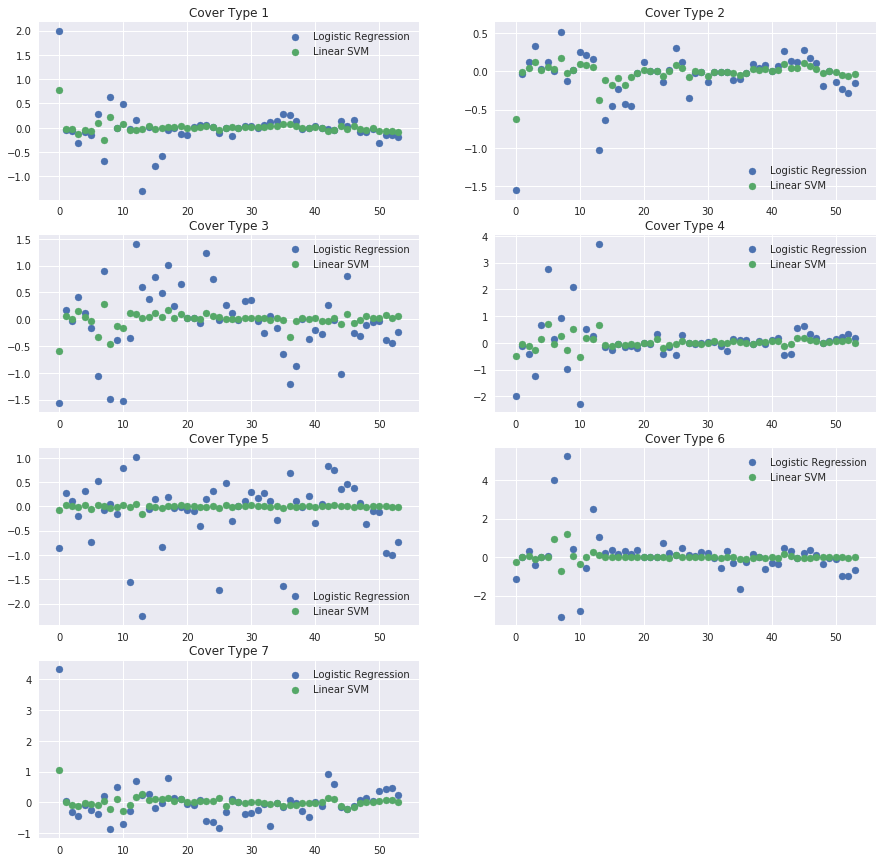

In [43]:
fig = plt.figure(figsize=(15,15))
for i in range(1,8):
    ax = fig.add_subplot(4,2,i)
    ax.scatter(range(X_train.shape[1]), logitmodel.coef_[i-1],label='Logistic Regression')
    ax.scatter(range(X_train.shape[1]), linearSVMmodel.coef_[i-1],label='Linear SVM')
    ax.set(title='Cover Type '+str(i))
    plt.legend()